<a href="https://colab.research.google.com/github/dsaliai/projects/blob/main/Car_ML_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=6, color='#DE3163'> Fuel Consumption Prediction using Regression - Classification Models

## Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, auc, accuracy_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = 'warn'

In [ ]:
# mount gdrive with this code
from google.colab import drive
drive.mount('/content/drive')
#below where the file is in gdrive, change with your
data_path = "/content/drive/My Drive/ML_763/"
###yearsBase, meanBase = np.loadtxt(data_path + 'file.csv', delimiter=',', unpack=True)

Mounted at /content/drive


In [ ]:
# load data
path = '/content/drive/MyDrive/ML_763/auto-mpg.csv'
data = pd.read_csv(path)
data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
data.shape

(398, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


## Data cleaning

In [ ]:
# does not show any null values for any columns
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
#abnormality in data
data[data.horsepower.str.isdigit()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


<font color='blue'> Though horsepower column  does not have any null values but observe some misleading character.

In [ ]:
# replacing ? with nan
data.horsepower = data.horsepower.replace('?', np.nan)

In [ ]:
# now getting 6 null values for horsepower column
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
# filling null with median value
data.horsepower = data.horsepower.fillna(data.horsepower.median())

In [ ]:
# # now no null values
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
# Observe two object types, need to convert numbers
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
# converting object type to float type
data.horsepower = data.horsepower.astype('float64')

In [ ]:
# dropping unused variable
data = data.drop('car name', axis = 1)

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [ ]:
data.shape

(398, 8)

## Exploratory Data Analysis (EDA)

<Axes: xlabel='mpg', ylabel='Density'>

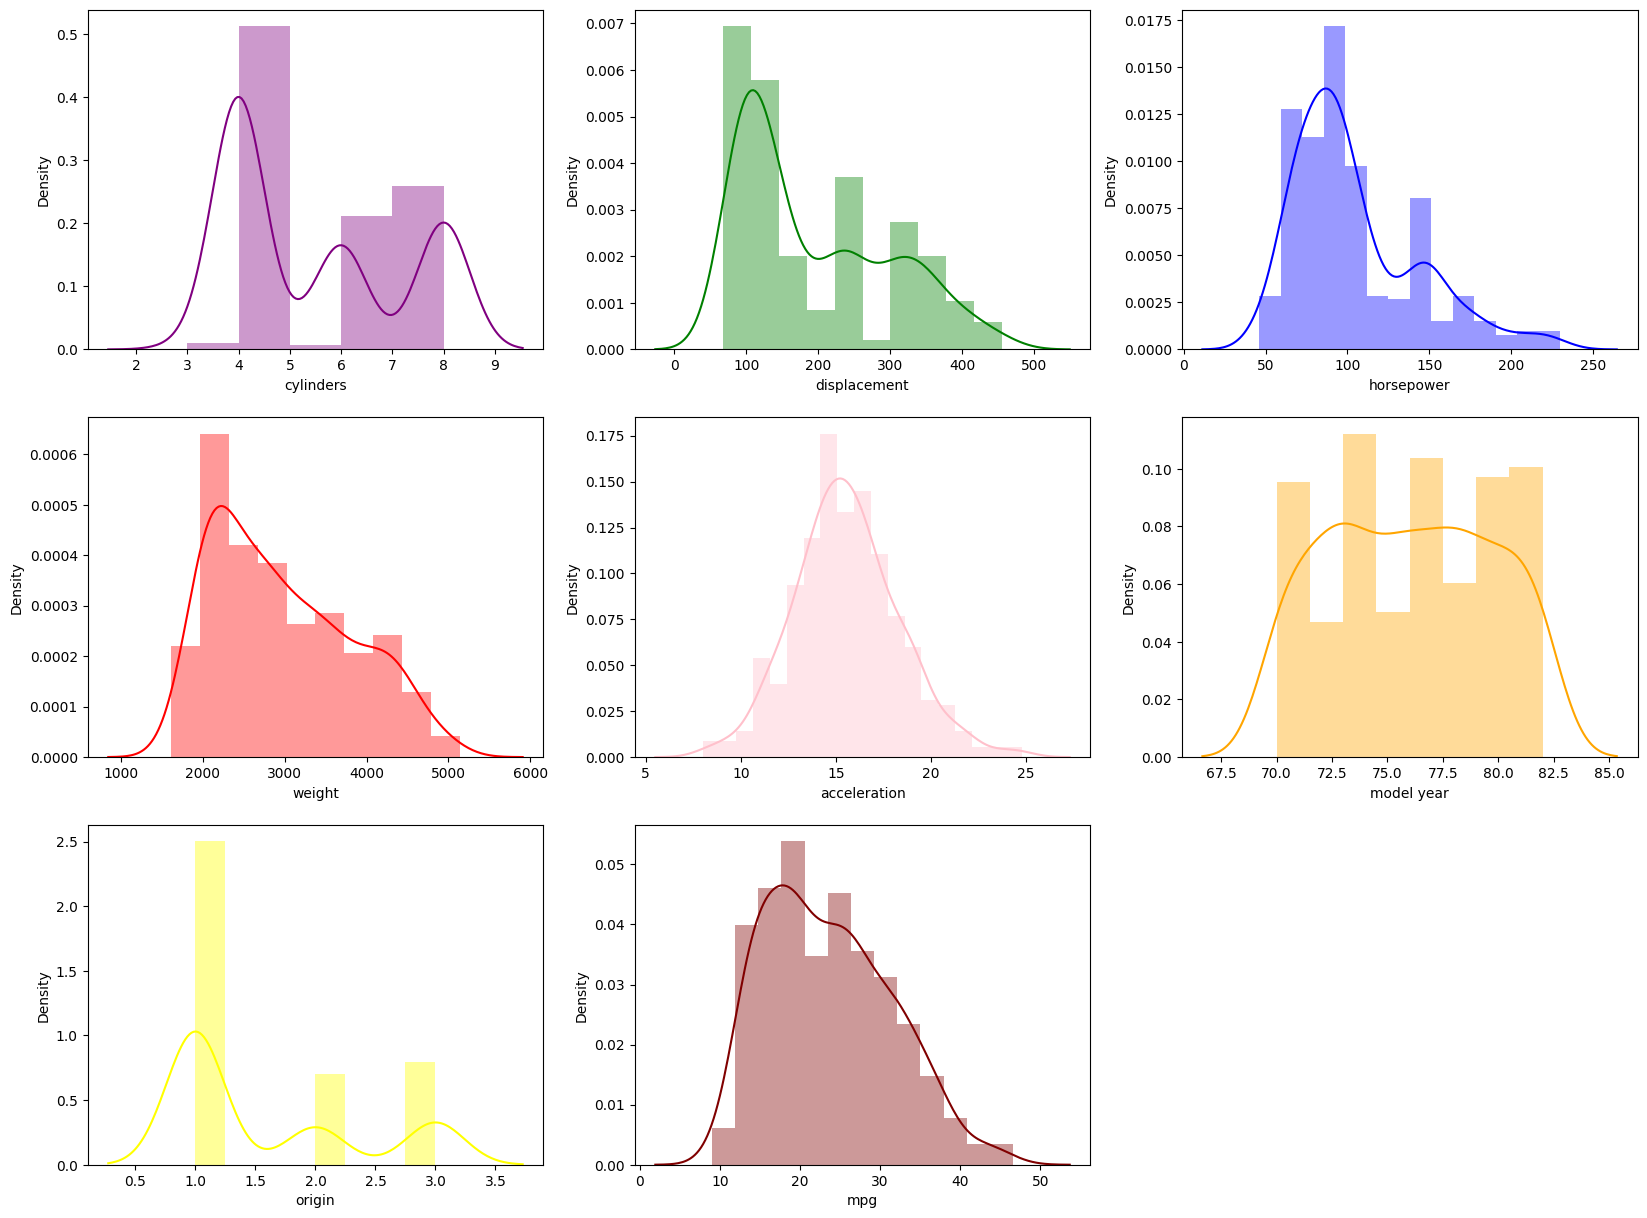

In [ ]:
# distribution of various features, how it looks

plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.distplot(data['cylinders'],color='purple')

plt.subplot(3,3,2)
sns.distplot(data['displacement'],color='green')

plt.subplot(3,3,3)
sns.distplot(data['horsepower'],color='blue')

plt.subplot(3,3,4)
sns.distplot(data['weight'],color='red')

plt.subplot(3,3,5)
sns.distplot(data['acceleration'],color='pink')

plt.subplot(3,3,6)
sns.distplot(data['model year'],color='orange')

plt.subplot(3,3,7)
sns.distplot(data['origin'],color='yellow')

plt.subplot(3,3,8)
sns.distplot(data['mpg'],color='maroon')


In [ ]:
data.corr().T

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


<Axes: >

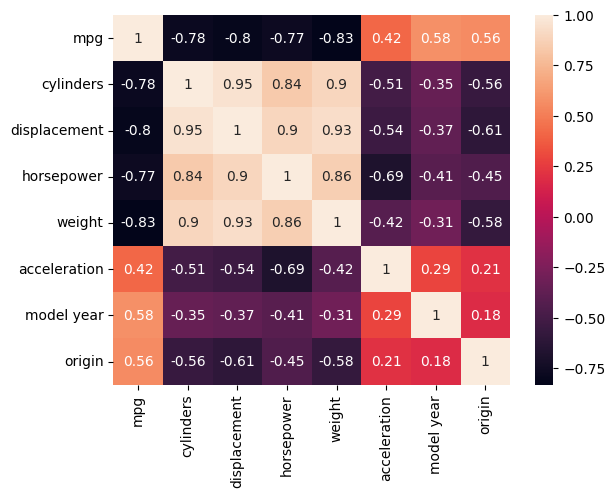

In [ ]:
sns.heatmap(data.corr(), annot=True)

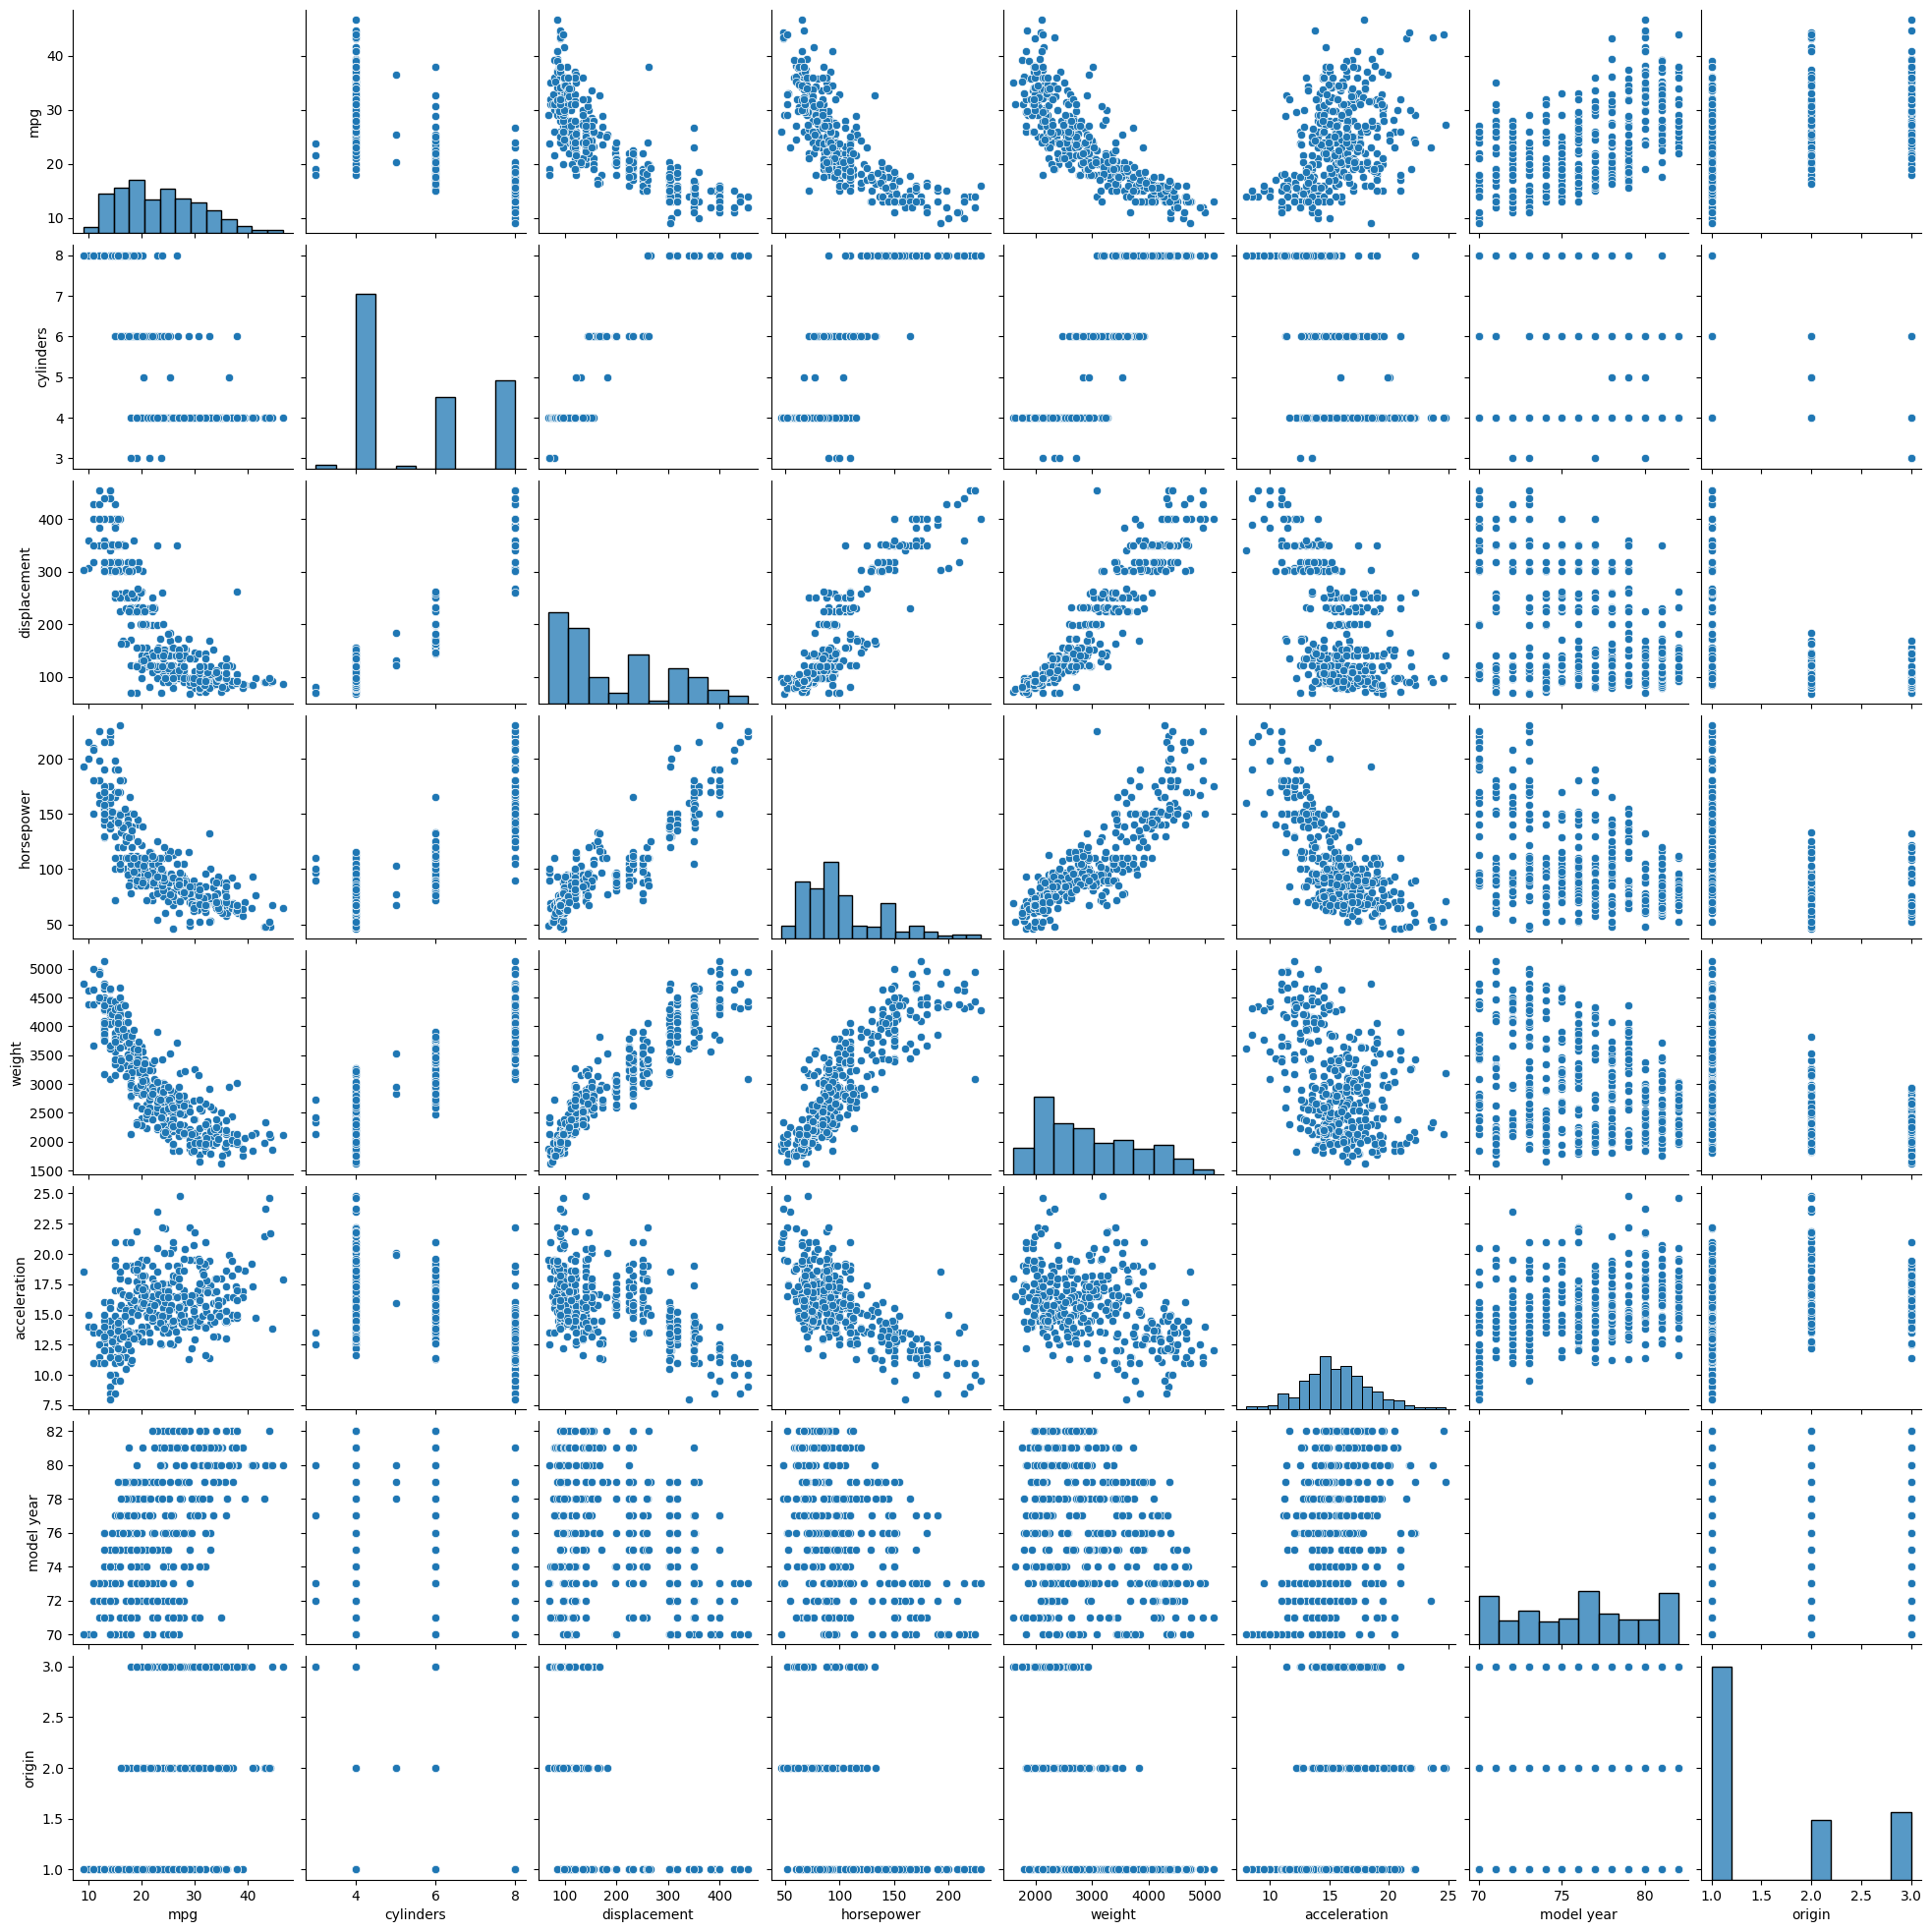

In [ ]:
sns.pairplot(data)

## Data Preprocessing

In [ ]:
# seperate the dependent and independent features

X = data.drop('mpg', axis=1)
y = data.mpg

In [ ]:
# calculate thereshold(25) value in standardize format

mean1 = y.mean()
sd1 = y.std()
threshold = (25-mean1)/sd1
threshold

0.19004991262460272

In [ ]:
# scale all the columns of data or standardize data


X_Scaled = preprocessing.scale(X)
X_Scaled = pd.DataFrame(X_Scaled, columns=X.columns)

#print(X_Scaled.head(2))
y_Scaled = preprocessing.scale(y)
y_Scaled = pd.DataFrame(y_Scaled, columns=['mpg'])

#print(y_Scaled.head(2))

In [ ]:
# Train test and split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y_Scaled,test_size = 0.30 ,random_state = 1)

print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

#print(X_train.columns)

X_train (278, 7)
X_test (120, 7)
y_train (278, 1)
y_test (120, 1)


In [ ]:
# create function for reusability

from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted,x_true):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    adj_r2_square = 1 - (1-r2_score(true, predicted))*(len(true)-1)/(len(true)-x_true.shape[1]-1)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('Adj R2 Square', adj_r2_square)
    print('__________________________________')

def evaluate(true, predicted,x_true):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    adj_r2_square = 1 - (1-r2_score(true, predicted))*(len(true)-1)/(len(true)-x_true.shape[1]-1)
    return mae, mse, rmse, r2_square, adj_r2_square

#<font size=*4*, color='blue'> Regression Models Analysis

## Linear Regression Model


In [ ]:
# Build a Linear Regression Model

regression_model = LinearRegression()

# Fit the model
regression_model.fit(X_train, y_train)


LinearRegression()

In [ ]:
#Converting the coefficient values to a dataframe

coef_t =  (regression_model.coef_).T
col_t = (X_train.columns).T

coeffcients = pd.DataFrame( col_t, columns=['Attribute'])
coeffcients['coeffcients'] = coef_t
coeffcients

,Attribute,coeffcients
0,cylinders,-0.085614
1,displacement,0.304418
2,horsepower,-0.097185
3,weight,-0.762863
4,acceleration,0.021591
5,model year,0.374941
6,origin,0.123026


small coefficients so model is not that complex

In [ ]:
intercept = regression_model.intercept_[0]

print('intercept: {:.6f}'.format(intercept))

intercept: 0.012833


In [ ]:
# Make predictions using the traning set

y_train_pred = regression_model.predict(X_train)

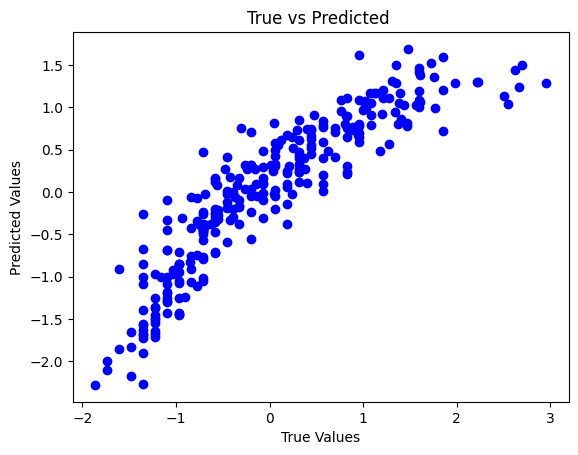

In [ ]:
# Visualizing the differences between actual and predicted

plt.scatter(y_train, y_train_pred, color='blue')
#plt.plot(y_train, y_train_pred, color='blue', linewidth=3)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted ")
#plt.xticks(()); plt.yticks(());
plt.show()

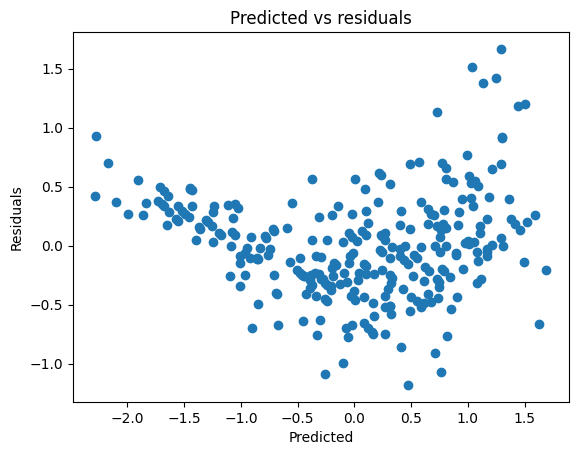

In [ ]:
# Checking residuals
plt.scatter(y_train_pred,y_train-y_train_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

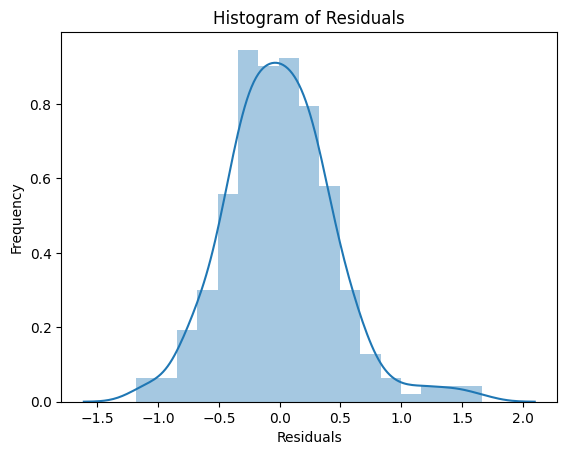

In [ ]:
# Checking Normality of errors
sns.distplot(y_train-y_train_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Predicting Test data with the model
y_test_pred = regression_model.predict(X_test)

In [ ]:
print('Linear Regression:\n')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_test_pred, X_test)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, y_train_pred, X_train)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, y_test_pred, X_test) , cross_val(LinearRegression())]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Adj R2 Square', "Cross Validation"])

Linear Regression:

Test set evaluation:
_____________________________________
MAE: 0.2960772496395953
MSE: 0.14658208429020422
RMSE: 0.3828603979131352
R2 Square 0.8472274567567306
Adj R2 Square 0.8376791728040263
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.3388745159054505
MSE: 0.19509735872536374
RMSE: 0.44169826660896433
R2 Square 0.8081802739111359
Adj R2 Square 0.8032071699014246
__________________________________


Here the model evaluations scores are almost matching with that of train data. So the model is not overfitting.

## Ridge Regression

In [ ]:
# Ridge regression

# this ridge regression is just an extension of linear regression and so we are just finding very minor difference with the coefficient of values
# model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
ridge = Ridge(alpha=.3) # coefficients are prevented to become too big by this alpha value
ridge.fit(X_train, y_train)

Ridge(alpha=0.3)

In [ ]:
#Converting the coefficient values to a dataframe

coef_t =  (ridge.coef_).T
col_t = (X_train.columns).T

coeffcients = pd.DataFrame( col_t, columns=['Attribute'])
coeffcients['coeffcients'] = coef_t
coeffcients

,Attribute,coeffcients
0,cylinders,-0.080730
1,displacement,0.288222
2,horsepower,-0.099857
3,weight,-0.751055
4,acceleration,0.019128
5,model year,0.373783
6,origin,0.122127


In [ ]:
print('intercept: {:.6f}'.format(ridge.intercept_[0]))

intercept: 0.012852


In [ ]:
test_pred = ridge.predict(X_test)
train_pred = ridge.predict(X_train)

In [ ]:
print('Ridge Regression:\n')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred, X_test)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred, X_train)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred, X_test) , cross_val(Ridge())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Adj R2 Square', "Cross Validation"])

results_df = results_df.append(results_df_2, ignore_index=True)

Ridge Regression:

Test set evaluation:
_____________________________________
MAE: 0.2958515985219912
MSE: 0.14628209786838767
RMSE: 0.3824684272830735
R2 Square 0.8475401122140553
Adj R2 Square 0.8380113692274338
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.3385904196587962
MSE: 0.1951127405662806
RMSE: 0.4417156784247992
R2 Square 0.8081651504849107
Adj R2 Square 0.8031916543863713
__________________________________


In [ ]:

display('alpha cylinders displacement horsepower weight acceler model year origin intercept')


for alp in np.arange(0.0000001, 1.1, 0.1):
    clf = Ridge(alpha = alp)    # 
    clf.fit(X_train, y_train)
    print(np.round(alp, 3), np.round(clf.coef_, 6), np.round(clf.intercept_, 4))

'alpha cylinders displacement horsepower weight acceler model year origin intercept'

0.0 [[-0.085614  0.304418 -0.097185 -0.762863  0.021591  0.374941  0.123026]] [0.0128]
0.1 [[-0.083926  0.298887 -0.09809  -0.758858  0.020753  0.37455   0.122718]] [0.0128]
0.2 [[-0.082298  0.29349  -0.09898  -0.754922  0.019932  0.374164  0.122418]] [0.0128]
0.3 [[-0.08073   0.288222 -0.099857 -0.751055  0.019128  0.373783  0.122127]] [0.0129]
0.4 [[-0.079218  0.283078 -0.100719 -0.747254  0.01834   0.373406  0.121844]] [0.0129]
0.5 [[-0.077761  0.278054 -0.101569 -0.743516  0.017569  0.373034  0.121569]] [0.0129]
0.6 [[-0.076356  0.273146 -0.102405 -0.739841  0.016813  0.372666  0.121302]] [0.0129]
0.7 [[-0.075001  0.268349 -0.103228 -0.736226  0.016072  0.372302  0.121041]] [0.0129]
0.8 [[-0.073694  0.26366  -0.104038 -0.73267   0.015346  0.371943  0.120788]] [0.0129]
0.9 [[-0.072434  0.259076 -0.104836 -0.729171  0.014635  0.371587  0.120542]] [0.0129]
1.0 [[-0.071219  0.254592 -0.105622 -0.725727  0.013937  0.371235  0.120302]] [0.0129]


## Lasso Regression

In [ ]:
# Lasso Regression
lasso = Lasso(alpha=0.1)

#model = Lasso(alpha=0.1, precompute=True, warm_start=True, positive=True, selection='random', random_state=42)
lasso.fit(X_train, y_train)

test_pred = lasso.predict(X_test)
train_pred = lasso.predict(X_train)

In [ ]:
#Converting the coefficient values to a dataframe

coef_t =  (lasso.coef_).T
col_t = (X_train.columns).T

coeffcients = pd.DataFrame( col_t, columns=['Attribute'])
coeffcients['coeffcients'] = coef_t
coeffcients

,Attribute,coeffcients
0,cylinders,-0.000000
1,displacement,-0.000000
2,horsepower,-0.013280
3,weight,-0.620521
4,acceleration,0.000000
5,model year,0.291987
6,origin,0.021568


In [ ]:
print('intercept: {:.6f}'.format(lasso.intercept_[0]))

intercept: 0.010364


In [ ]:
print('Lasso Regression:\n')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred, X_test)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred, X_train)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred, X_test) , cross_val(Lasso())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Adj R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Lasso Regression:

Test set evaluation:
_____________________________________
MAE: 0.31112796592062264
MSE: 0.16525513758640684
RMSE: 0.4065158515807309
R2 Square 0.8277658025171161
Adj R2 Square 0.8170011651744358
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.3448395914917869
MSE: 0.21829017997244238
RMSE: 0.46721534646503465
R2 Square 0.7853770917055521
Adj R2 Square 0.7798127940831034
__________________________________


## Regularization Ridge and Lasso Technique

In [ ]:

# 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin'

print('alp cylind displac horsep weight acceler modelyr origin intercept')


for alp in np.arange(0.0000001, 1.1, 0.1):
    clf = Ridge(alpha = alp)    # 
    clf.fit(X_train, y_train)
    print(np.round(alp, 3), np.round(clf.coef_, 3), np.round(clf.intercept_, 3))

print('\n')


print('alp cylind displac horsep weight acceler modelyr origin intercept')
for alp in np.arange(0.0000001, 1.1, 0.1):
    clf = Lasso(alpha = alp)    # 
    clf.fit(X_train, y_train)
    print(np.round(alp, 3), np.round(clf.coef_, 3), np.round(clf.intercept_, 3), )

alp cylind displac horsep weight acceler modelyr origin intercept
0.0 [[-0.086  0.304 -0.097 -0.763  0.022  0.375  0.123]] [0.013]
0.1 [[-0.084  0.299 -0.098 -0.759  0.021  0.375  0.123]] [0.013]
0.2 [[-0.082  0.293 -0.099 -0.755  0.02   0.374  0.122]] [0.013]
0.3 [[-0.081  0.288 -0.1   -0.751  0.019  0.374  0.122]] [0.013]
0.4 [[-0.079  0.283 -0.101 -0.747  0.018  0.373  0.122]] [0.013]
0.5 [[-0.078  0.278 -0.102 -0.744  0.018  0.373  0.122]] [0.013]
0.6 [[-0.076  0.273 -0.102 -0.74   0.017  0.373  0.121]] [0.013]
0.7 [[-0.075  0.268 -0.103 -0.736  0.016  0.372  0.121]] [0.013]
0.8 [[-0.074  0.264 -0.104 -0.733  0.015  0.372  0.121]] [0.013]
0.9 [[-0.072  0.259 -0.105 -0.729  0.015  0.372  0.121]] [0.013]
1.0 [[-0.071  0.255 -0.106 -0.726  0.014  0.371  0.12 ]] [0.013]


alp cylind displac horsep weight acceler modelyr origin intercept
0.0 [-0.086  0.304 -0.097 -0.763  0.022  0.375  0.123] [0.013]
0.1 [-0.    -0.    -0.013 -0.621  0.     0.292  0.022] [0.01]
0.2 [-0.    -0.    -0.    

<font color='blue'> By using Lasso regularization method, able to drop less important predictors depends on lambda value

## Elastic Net

In [ ]:

model = ElasticNet(alpha=0.1, selection='random', random_state=0)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Elastic Net:\n')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred, X_test)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred, X_train)



results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred, X_test) , cross_val(ElasticNet())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Adj R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Elastic Net:

Test set evaluation:
_____________________________________
MAE: 0.2994384524937771
MSE: 0.15144665135995167
RMSE: 0.389161472090894
R2 Square 0.8421574491454905
Adj R2 Square 0.8322922897170837
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.3394757774487708
MSE: 0.20905485072498045
RMSE: 0.45722516414232983
R2 Square 0.7944572675631985
Adj R2 Square 0.7891283819074295
__________________________________


## Polynomial Regression

In [ ]:

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression()

lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Polynomial Regression:\n')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred, X_test)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred, X_train)


results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred, X_test) , 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Adj R2 Square', 'Cross Validation'])


results_df = results_df.append(results_df_2, ignore_index=True)


Polynomial Regression:

Test set evaluation:
_____________________________________
MAE: 0.2984000165812946
MSE: 0.15440550174496126
RMSE: 0.39294465481154117
R2 Square 0.8390736405028236
Adj R2 Square 0.8290157430342501
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.23672815852230128
MSE: 0.1058352454163816
RMSE: 0.3253232936885731
R2 Square 0.8959427850845694
Adj R2 Square 0.8932450054386137
__________________________________


## Random Forest Regressor

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=0)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Random Forest Regressor:\n')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred, X_test)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred, X_train)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred, X_test), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Adj R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Random Forest Regressor:

Test set evaluation:
_____________________________________
MAE: 0.2495500648537856
MSE: 0.12264187870569904
RMSE: 0.3502026252124604
R2 Square 0.8721787058170907
Adj R2 Square 0.8641898749306589
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0916611584669651
MSE: 0.01748947790272089
RMSE: 0.13224778978387838
R2 Square 0.9828043450579989
Adj R2 Square 0.9823585317817247
__________________________________


## Support Vector Machine Regression

Generate SVM models using different box constraints with gamma =auto

In [ ]:
svm_reg = SVR(kernel='rbf', C=100.0, gamma='auto')
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)


print('Support Vector Machine Regression: C=100.0\n')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred, X_test)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred, X_train)

Support Vector Machine Regression: C=100.0

Test set evaluation:
_____________________________________
MAE: 0.3294964985534182
MSE: 0.20736481433109077
RMSE: 0.45537326923205623
R2 Square 0.7838777486489447
Adj R2 Square 0.7703701079395038
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.12772789013791197
MSE: 0.030850843572737867
RMSE: 0.1756440820885744
R2 Square 0.9696674501264603
Adj R2 Square 0.9688810506852944
__________________________________


In [ ]:
svm_reg = SVR(kernel='rbf', C=10.0, gamma='auto')
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Support Vector Machine Regression: C=10.0\n')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred, X_test)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred, X_train)

Support Vector Machine Regression: C=10.0

Test set evaluation:
_____________________________________
MAE: 0.2716871144234181
MSE: 0.121998077804191
RMSE: 0.34928223230532496
R2 Square 0.8728496957374616
Adj R2 Square 0.8649028017210529
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.15821811622553972
MSE: 0.05871724437028658
RMSE: 0.24231641374510018
R2 Square 0.9422692044352264
Adj R2 Square 0.9407724801057693
__________________________________


In [ ]:


svm_reg = SVR(kernel='rbf', C=1.0, gamma='auto')
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Support Vector Machine Regression: C=1.0\n')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred, X_test)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred, X_train)

results_df_2 = pd.DataFrame(data=[["SVM Regression", *evaluate(y_test, test_pred, X_test), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Adj R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Support Vector Machine Regression: C=1.0

Test set evaluation:
_____________________________________
MAE: 0.25564057621393876
MSE: 0.10608010464215432
RMSE: 0.3256994084154196
R2 Square 0.8894399172165606
Adj R2 Square 0.8825299120425956
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.20046586151645657
MSE: 0.08509999551854601
RMSE: 0.2917190352351831
R2 Square 0.9163296831019124
Adj R2 Square 0.9141604526638138
__________________________________


## <font size=*4*, color='blue'>Models Comparison

In [ ]:
result = results_df.sort_values(by='Adj R2 Square', ascending=False)
#results_df.set_index('Model', inplace=True)


In [ ]:

results_df = results_df.sort_values(by='Adj R2 Square', ascending=False)
results_df.set_index('Model', inplace=True)
results_df

,MAE,MSE,RMSE,R2 Square,Adj R2 Square,Cross Validation
Model,,,,,,
SVM Regression,0.255641,0.106080,0.325699,0.889440,0.882530,0.000000
Random Forest Regressor,0.249550,0.122642,0.350203,0.872179,0.864190,0.000000
Ridge Regression,0.295852,0.146282,0.382468,0.847540,0.838011,0.633120
Linear Regression,0.296077,0.146582,0.382860,0.847227,0.837679,0.633153
Elastic Net Regression,0.299438,0.151447,0.389161,0.842157,0.832292,0.612605
Polynomail Regression,0.298400,0.154406,0.392945,0.839074,0.829016,0.000000
Lasso Regression,0.311128,0.165255,0.406516,0.827766,0.817001,0.612413


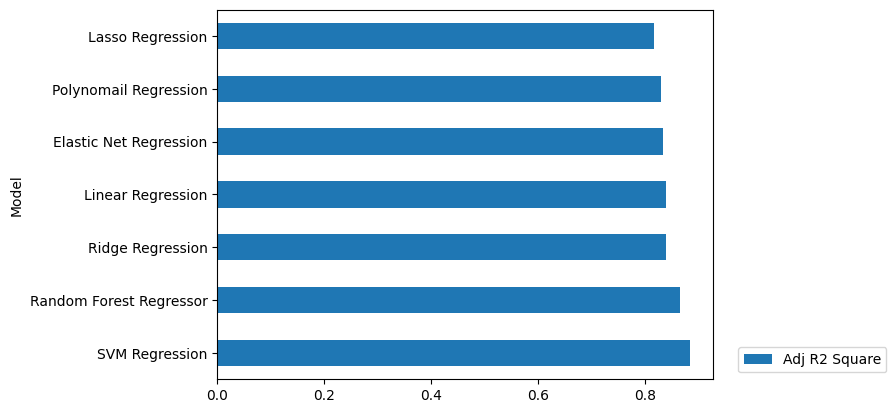

In [ ]:
result.plot(x="Model", y=["Adj R2 Square"], kind="barh")
plt.legend(bbox_to_anchor=(1.2, 0), loc='lower center')
plt.show()

<font color='blue'> **Conclusion:** As per analysis, model is best fit for  SVM Regressor. Next closer models are Random Forest Regressor

#<font size=*4*, color='blue'> Classification Models Analysis

In [ ]:
# Specifying the features (X) and target (y) variables
feature_set = data.drop(['mpg'], axis=1)
#feature_set

In [ ]:
# Creating a binary target column based on mpg values
target_variable = (data['mpg'] >= 25).astype(int)
target_variable

0      0
1      0
2      0
3      0
4      0
      ..
393    1
394    1
395    1
396    1
397    1
Name: mpg, Length: 398, dtype: int64

In [ ]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_Scaled, target_variable,test_size = 0.30 ,random_state = 1)

print('X_train', Xc_train.shape)
print('X_test', Xc_test.shape)
print('y_train', yc_train.shape)
print('y_test', yc_test.shape)

X_train (278, 7)
X_test (120, 7)
y_train (278,)
y_test (120,)


In [ ]:
def print_classification_evaluate(true, predicted):

   acc_score = accuracy_score(true, predicted)
   #print("\n", "Accuracy: ".format(format(acc_score,'.3f')))
   print("\n", "Accuracy: ", np.round(acc_score,3))
   print("\n", "CFM: \n", confusion_matrix(true, predicted))
   print("\n", "Classification report: \n", classification_report(true, predicted))

def evaluate_report_class0(true, predicted):

    report = classification_report(true, predicted, output_dict=True)
    return report['0']['precision'], report['0']['recall'], report['0']['f1-score']


def evaluate_report_class1(true, predicted):

    report = classification_report(true, predicted, output_dict=True)
    return report['1']['precision'], report['1']['recall'], report['1']['f1-score']




## SVM No Kernel

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
clf_noKernel = SVC()
clf_noKernel.fit(Xc_train, yc_train)
clf_noKernel.score(Xc_train, yc_train)

0.920863309352518

In [ ]:
print('SVM Model with no kernel')
Yh_test = clf_noKernel.predict(Xc_test)
print_classification_evaluate(yc_test, Yh_test)

results_class_df0 = pd.DataFrame(data=[["SVM No Kernel", *evaluate_report_class0(yc_test, Yh_test)]],
                            columns=['Model', 'precision', 'recall', 'f1-score'])


results_class_df1 = pd.DataFrame(data=[["SVM No Kernel", *evaluate_report_class1(yc_test, Yh_test)]],
                            columns=['Model', 'precision', 'recall', 'f1-score'])


SVM Model with no kernel

 Accuracy:  0.892

 CFM: 
 [[63  6]
 [ 7 44]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91        69
           1       0.88      0.86      0.87        51

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, auc, accuracy_score

C = 1.0 # SVM regularization parameter
clf_nokernel1 = svm.SVC(C = C, probability = True)
clf_nokernel1.fit(Xc_test, yc_test)
yhat = clf_nokernel1.predict_proba(Xc_test)

#Class 0
fpr_0,tpr_0,_=roc_curve(yc_test,yhat[:,0],pos_label=0)
roc_auc_0 = roc_auc_score(yc_test,yhat[:,0])

#Class 1
fpr_1, tpr_1, _ = roc_curve(yc_test, yhat[:, -1], pos_label=1)
roc_auc_1 = roc_auc_score(yc_test, yhat[:, -1])

roc_auc_0:  0.011366865586814434
roc_auc_1:  0.9886331344131856 



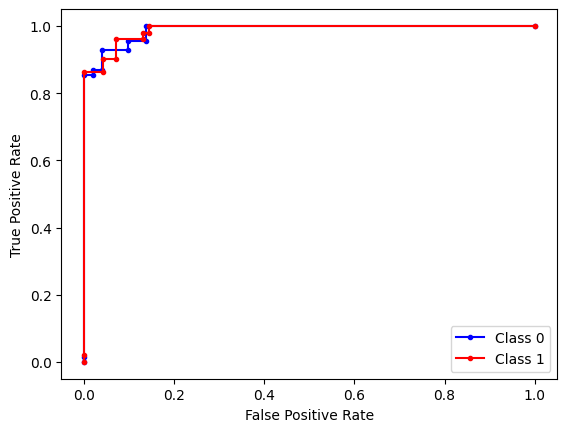

In [ ]:
# plot ROC curves
print('roc_auc_0: ', roc_auc_0)
print('roc_auc_1: ', roc_auc_1, '\n')
plt.plot(fpr_0, tpr_0, marker='.', label='Class 0', color='b')
plt.plot(fpr_1, tpr_1, marker='.', label='Class 1', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

 ## SVM with Linear Kernel

 #### instantiate classifier with <font color='blue'>**linear kernel and C=100.0**

In [ ]:
# instantiate classifier with linear kernel and C=100.0
clf_linear = svm.SVC(kernel='linear', C=100.0)
clf_linear.fit(Xc_train, yc_train)

SVC(C=100.0, kernel='linear')

In [ ]:
print('SVM Model result with linear kernel and C=100.0')
Yh_test = clf_linear.predict(Xc_test)
print_classification_evaluate(yc_test, Yh_test)

SVM Model result with linear kernel and C=100.0

 Accuracy:  0.883

 CFM: 
 [[64  5]
 [ 9 42]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        69
           1       0.89      0.82      0.86        51

    accuracy                           0.88       120
   macro avg       0.89      0.88      0.88       120
weighted avg       0.88      0.88      0.88       120



#### instantiate classifier with <font color='blue'>**linear kernel and C=10.0**

In [ ]:
# instantiate classifier with linear kernel and C=10.0
clf_linear = svm.SVC(kernel='linear', C=10.0)
clf_linear.fit(Xc_train, yc_train)

SVC(C=10.0, kernel='linear')

In [ ]:
print('SVM Model result with linear kernel and C=10.0')
Yh_test = clf_linear.predict(Xc_test)
print_classification_evaluate(yc_test, Yh_test)

SVM Model result with linear kernel and C=10.0

 Accuracy:  0.883

 CFM: 
 [[64  5]
 [ 9 42]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        69
           1       0.89      0.82      0.86        51

    accuracy                           0.88       120
   macro avg       0.89      0.88      0.88       120
weighted avg       0.88      0.88      0.88       120



 #### instantiate classifier with <font color='blue'>**linear kernel and C=1.0**

In [ ]:
# instantiate classifier with linear kernel and C=1.0

C = 1.0  # SVM regularization parameter
clf_linear = svm.SVC(kernel='linear', C=1.0, gamma='auto')
clf_linear.fit(Xc_train, yc_train)

SVC(gamma='auto', kernel='linear')

In [ ]:
print('SVM Model result with linear kernel and C=1.0')
Yh_test = clf_linear.predict(Xc_test)
print_classification_evaluate(yc_test, Yh_test)

class_df_linear0 = pd.DataFrame(data=[["SVM with Linear Kernel", *evaluate_report_class0(yc_test, Yh_test)]],
                            columns=['Model', 'precision', 'recall', 'f1-score'])
results_class_df0 = results_class_df0.append(class_df_linear0, ignore_index=True)


class_df_linear1 = pd.DataFrame(data=[["SVM with Linear Kernel", *evaluate_report_class1(yc_test, Yh_test)]],
                            columns=['Model', 'precision', 'recall', 'f1-score'])
results_class_df1 = results_class_df1.append(class_df_linear1, ignore_index=True)


SVM Model result with linear kernel and C=1.0

 Accuracy:  0.9

 CFM: 
 [[64  5]
 [ 7 44]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.93      0.91        69
           1       0.90      0.86      0.88        51

    accuracy                           0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120



In [ ]:
clf1 = svm.SVC(kernel = 'linear', C = 1.0, probability = True)
clf1.fit(Xc_train, yc_train)
yhat = clf1.predict_proba(Xc_test)

# class 0
fpr_0, tpr_0, _ = roc_curve(yc_test, yhat[:, 0], pos_label=0)
roc_auc_0 = roc_auc_score(yc_test, 1-yhat[:, 0])  # either
roc_auc_0 = auc(fpr_0, tpr_0)               # or

# class 1
fpr_1, tpr_1, _ = roc_curve(yc_test, yhat[:, 1], pos_label=1)
roc_auc_1 = roc_auc_score(yc_test, yhat[:, 1])    # either
roc_auc_1 = auc(fpr_1, tpr_1)

roc_auc_0:  0.9664677465188974
roc_auc_1:  0.9664677465188973 



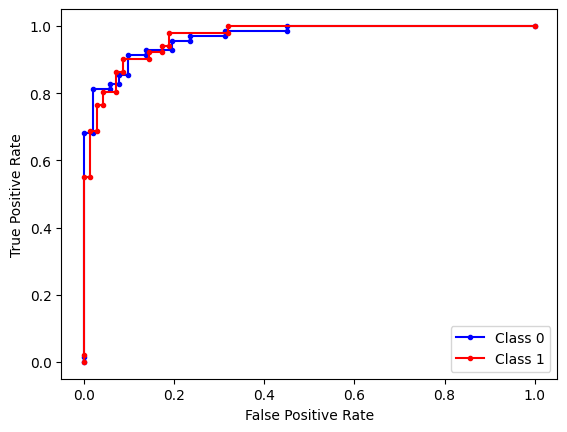

In [ ]:
# plot ROC curves
print('roc_auc_0: ', roc_auc_0)
print('roc_auc_1: ', roc_auc_1, '\n')

plt.plot(fpr_0, tpr_0, marker='.', label='Class 0', color='b')
plt.plot(fpr_1, tpr_1, marker='.', label='Class 1', color='r')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

<font color='purple'>Comparing above models where C=100.0, C=10.0 and C=1.0, observe that run SVM with linear kernel and C=1.0 give higher precision, recall, f1-score.

 ## SVM with RBF Kernel

#### Run SVM with <font color='blue'> **RBF kernel and  C=100.0 and gamma = auto**

In [ ]:
clf_rbf = svm.SVC(kernel='rbf', C=100.0, gamma='auto')
clf_rbf.fit(Xc_train, yc_train)

SVC(C=100.0, gamma='auto')

In [ ]:

print('SVM Model result with RBF kernel and C=100.0, gamma=auto')
Yh_test = clf_rbf.predict(Xc_test)
print_classification_evaluate(yc_test, Yh_test)

SVM Model result with RBF kernel and C=100.0, gamma=auto

 Accuracy:  0.883

 CFM: 
 [[64  5]
 [ 9 42]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        69
           1       0.89      0.82      0.86        51

    accuracy                           0.88       120
   macro avg       0.89      0.88      0.88       120
weighted avg       0.88      0.88      0.88       120



#### Run SVM with RBF kernel and <font color='blue'>**C=10.0 and gamma = auto**

In [ ]:
clf_rbf = svm.SVC(kernel='rbf', C=10.0)
clf_rbf.fit(Xc_train, yc_train)

SVC(C=10.0)

In [ ]:
print('SVM Model result with RBF kernel and C=10.0, gamma=auto')
Yh_test = clf_rbf.predict(Xc_test)
print_classification_evaluate(yc_test, Yh_test)

SVM Model result with RBF kernel and C=10.0, gamma=auto

 Accuracy:  0.892

 CFM: 
 [[64  5]
 [ 8 43]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        69
           1       0.90      0.84      0.87        51

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120



 #### Run SVM with <font color='blue'>**RBF kernel and C=1.0 and gamma = auto**

In [ ]:
clf_rbf = svm.SVC(kernel='rbf', C=1.0, gamma='auto')
clf_rbf.fit(Xc_train, yc_train)

SVC(gamma='auto')

In [ ]:

print('SVM Model result with RBF kernel and C=1.0, gamma=auto')
Yh_test = clf_rbf.predict(Xc_test)
print_classification_evaluate(yc_test, Yh_test)

class_df_rbf0 = pd.DataFrame(data=[["SVM with RBF Kernel", *evaluate_report_class0(yc_test, Yh_test)]],
                            columns=['Model', 'precision', 'recall', 'f1-score'])
results_class_df0 = results_class_df0.append(class_df_rbf0, ignore_index=True)

class_df_rbf1 = pd.DataFrame(data=[["SVM with RBF Kernel", *evaluate_report_class1(yc_test, Yh_test)]],
                            columns=['Model', 'precision', 'recall', 'f1-score'])
results_class_df1 = results_class_df1.append(class_df_rbf1, ignore_index=True)


SVM Model result with RBF kernel and C=1.0, gamma=auto

 Accuracy:  0.892

 CFM: 
 [[63  6]
 [ 7 44]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91        69
           1       0.88      0.86      0.87        51

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120



roc_auc_0:  0.9741403807899971
roc_auc_1:  0.9741403807899971 



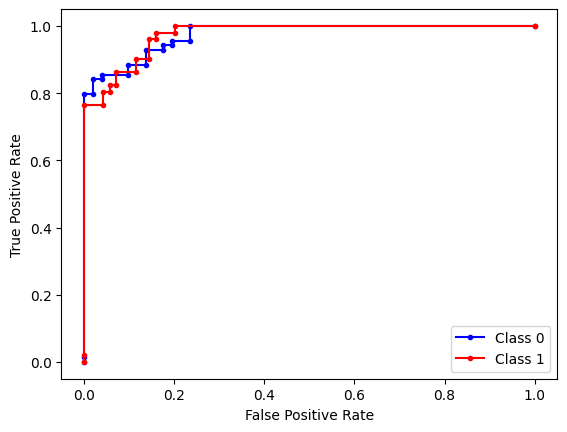

In [ ]:
clf_rbf1 = svm.SVC(kernel='rbf', C=1.0, gamma='auto', probability=True)
clf_rbf1.fit(Xc_train, yc_train)
yhat = clf_rbf1.predict_proba(Xc_test)

# class 0
fpr_0, tpr_0, _ = roc_curve(yc_test, yhat[:, 0], pos_label=0)
roc_auc_0 = roc_auc_score(yc_test, 1-yhat[:, 0])  # either
roc_auc_0 = auc(fpr_0, tpr_0)               # or

# class 1
fpr_1, tpr_1, _ = roc_curve(yc_test, yhat[:, 1], pos_label=1)
roc_auc_1 = roc_auc_score(yc_test, yhat[:, 1])    # either
roc_auc_1 = auc(fpr_1, tpr_1)

# plot ROC curves
print('roc_auc_0: ', roc_auc_0)
print('roc_auc_1: ', roc_auc_1, '\n')

plt.plot(fpr_0, tpr_0, marker='.', label='Class 0', color='b')
plt.plot(fpr_1, tpr_1, marker='.', label='Class 1', color='r')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

<font color='purple'>Get maximum accuracy and higher precision, recall, f1-score of each class with SVM kernel RBF and C=1.0

## Logistic Regression

 #### Run Logistic Regression with <font color='blue'>**C=100.0**


In [ ]:
from sklearn.linear_model import LogisticRegression

# Creating the logistic regression model
logistic_model = LogisticRegression(C=100.0)
# Training the model using the training dataset
logistic_model.fit(Xc_train, yc_train)


LogisticRegression(C=100.0)

In [ ]:
print('Logistic Model with C=100.0')
Yh_test = logistic_model.predict(Xc_test)
print_classification_evaluate(yc_test, Yh_test)

Logistic Model with C=100.0

 Accuracy:  0.892

 CFM: 
 [[66  3]
 [10 41]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91        69
           1       0.93      0.80      0.86        51

    accuracy                           0.89       120
   macro avg       0.90      0.88      0.89       120
weighted avg       0.90      0.89      0.89       120



 #### Run Logistic Regression with <font color='blue'>**C=10.0**


In [ ]:
from sklearn.linear_model import LogisticRegression

# Creating the logistic regression model
logistic_model = LogisticRegression(C=10.0)
# Training the model using the training dataset
logistic_model.fit(Xc_train, yc_train)


LogisticRegression(C=10.0)

In [ ]:
print('Logistic Model with C=10.0')
Yh_test = logistic_model.predict(Xc_test)
print_classification_evaluate(yc_test, Yh_test)

Logistic Model with C=10.0

 Accuracy:  0.9

 CFM: 
 [[66  3]
 [ 9 42]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        69
           1       0.93      0.82      0.87        51

    accuracy                           0.90       120
   macro avg       0.91      0.89      0.90       120
weighted avg       0.90      0.90      0.90       120



 #### Run Logistic Regression with <font color='blue'>**C=1.0**


In [ ]:
from sklearn.linear_model import LogisticRegression

# Creating the logistic regression model
logistic_model = LogisticRegression(C=1.0)
# Training the model using the training dataset
logistic_model.fit(Xc_train, yc_train)


LogisticRegression()

In [ ]:
print('Logistic Model with C=1.0')
Yh_test = logistic_model.predict(Xc_test)
print_classification_evaluate(yc_test, Yh_test)

class_df_logit_compare = pd.DataFrame(data=[["Logistic Regression", *evaluate_report_class0(yc_test, Yh_test)]],
                            columns=['Model', 'precision', 'recall', 'f1-score'])

class_df_logit0 = pd.DataFrame(data=[["Logistic Regression", *evaluate_report_class0(yc_test, Yh_test)]],
                            columns=['Model', 'precision', 'recall', 'f1-score'])
results_class_df0 = results_class_df0.append(class_df_logit0, ignore_index=True)

class_df_logit1 = pd.DataFrame(data=[["Logistic Regression", *evaluate_report_class1(yc_test, Yh_test)]],
                            columns=['Model', 'precision', 'recall', 'f1-score'])
results_class_df1 = results_class_df1.append(class_df_logit1, ignore_index=True)

Logistic Model with C=1.0

 Accuracy:  0.908

 CFM: 
 [[66  3]
 [ 8 43]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        69
           1       0.93      0.84      0.89        51

    accuracy                           0.91       120
   macro avg       0.91      0.90      0.90       120
weighted avg       0.91      0.91      0.91       120



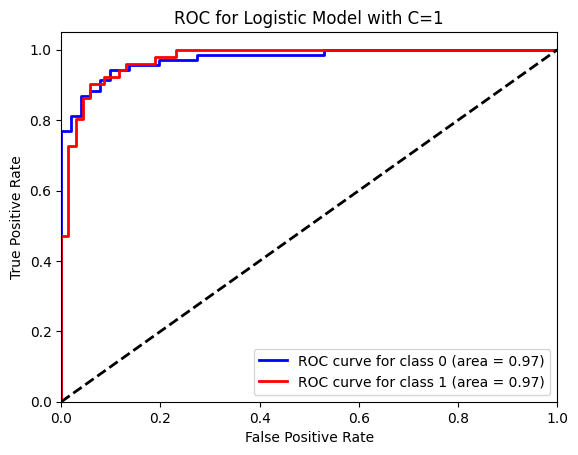

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming logistic_model is your model with C=1
# Assuming Xc_test is your test features and yc_test are the test labels

# Get probability estimates
probabilities = logistic_model.predict_proba(Xc_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(yc_test, probabilities[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure()
colors = ['blue', 'red']
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve for class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistic Model with C=1')
plt.legend(loc="lower right")
plt.show()

<font color='purple'>Get maximum accuracy and higher precision, recall, f1-score of each class with Logistic Regression C=1.0

## Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
#classifier.fit(feature_set, target_variable)
classifier.fit(Xc_train, yc_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
print('Decision Tree Model')
Yh_test = classifier.predict(Xc_test)
print_classification_evaluate(yc_test, Yh_test)

class_df_dt0 = pd.DataFrame(data=[["Decision Tree Classification", *evaluate_report_class0(yc_test, Yh_test)]],
                            columns=['Model', 'precision', 'recall', 'f1-score'])
results_class_df0 = results_class_df0.append(class_df_dt0, ignore_index=True)

class_df_dt1 = pd.DataFrame(data=[["Decision Tree Classification", *evaluate_report_class1(yc_test, Yh_test)]],
                            columns=['Model', 'precision', 'recall', 'f1-score'])
results_class_df1 = results_class_df1.append(class_df_dt1, ignore_index=True)

Decision Tree Model

 Accuracy:  0.867

 CFM: 
 [[61  8]
 [ 8 43]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        69
           1       0.84      0.84      0.84        51

    accuracy                           0.87       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.87      0.87      0.87       120



In [ ]:
print('Class 0')
results_class_df0 = results_class_df0.sort_values(by='precision', ascending=False)
round(results_class_df0, 3)

Class 0


,Model,precision,recall,f1-score
1,SVM with Linear Kernel,0.901,0.928,0.914
0,SVM No Kernel,0.900,0.913,0.906
2,SVM with RBF Kernel,0.900,0.913,0.906
3,Logistic Regression,0.892,0.957,0.923
4,Decision Tree Classification,0.884,0.884,0.884


In [ ]:
print('Class 1')
results_class_df1 = results_class_df1.sort_values(by='precision', ascending=False)
round(results_class_df1, 3)

Class 1


,Model,precision,recall,f1-score
3,Logistic Regression,0.935,0.843,0.887
1,SVM with Linear Kernel,0.898,0.863,0.880
0,SVM No Kernel,0.880,0.863,0.871
2,SVM with RBF Kernel,0.880,0.863,0.871
4,Decision Tree Classification,0.843,0.843,0.843


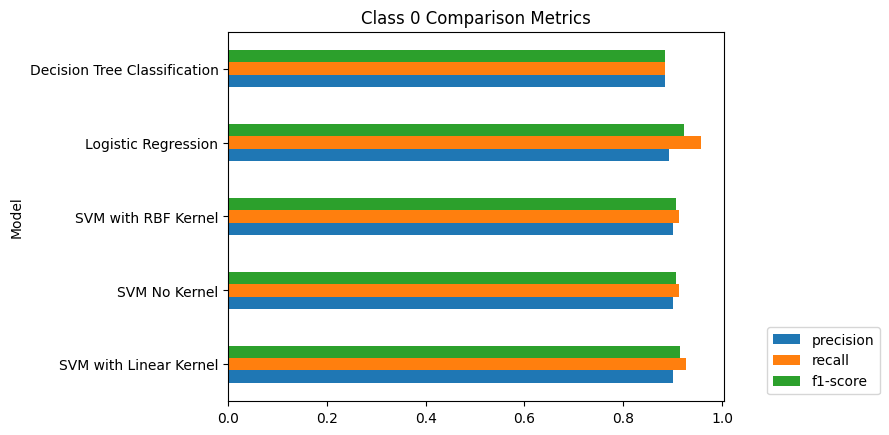

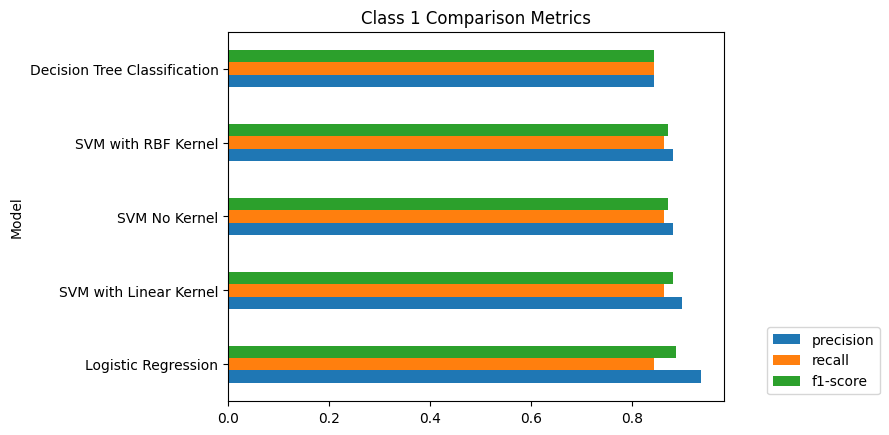

In [ ]:
import matplotlib.pyplot as plt

ind = np.arange(5)

results_class_df0 = results_class_df0.sort_values(by='precision', ascending=False)
results_class_df0.plot(x="Model", y=[ "precision","recall", "f1-score"], kind="barh")
#plt.bar_label(ind, fmt='%.2f')
plt.title('Class 0 Comparison Metrics')
plt.legend(bbox_to_anchor=(1.2, 0), loc='lower center')
plt.show()

results_class_df1 = results_class_df1.sort_values(by='precision', ascending=False)
results_class_df1.plot(x="Model", y=[ "precision","recall", "f1-score"], kind="barh")
#plt.bar_label(ind, fmt='%.2f')
plt.title('Class 1 Comparison Metrics')
plt.legend(bbox_to_anchor=(1.2, 0), loc='lower center')
plt.show()

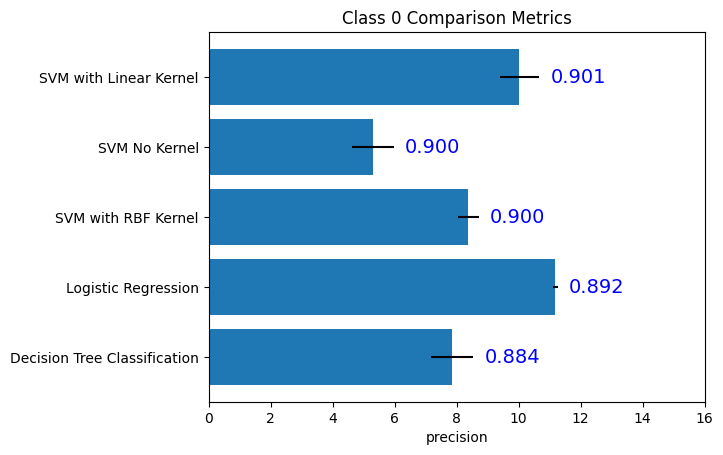

In [ ]:
import matplotlib.pyplot as plt

#results_class_df0 = results_class_df0.sort_values(by='precision', ascending=False)
#f1_scores0 = results_class_df0['f1-score']
precision_scores0 = results_class_df0['precision']
#recall_scores0 = results_class_df0['recall']
models0 = results_class_df0['Model']

fig, ax = plt.subplots()
y_pos = np.arange(len(models0))
performance = 3 + 10 * np.random.rand(len(models0))
error = np.random.rand(len(models0))

hbars = ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=models0)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('precision')
ax.set_title('Class 0 Comparison Metrics')

ax.bar_label(hbars, labels=['%.3f' % e for e in precision_scores0],
             padding=8, color='b', fontsize=14)
ax.set_xlim(right=16)
plt.show()

#print('The Logistic regression model has higher precision, next is SVM (kernel=linear, C=1.0)')

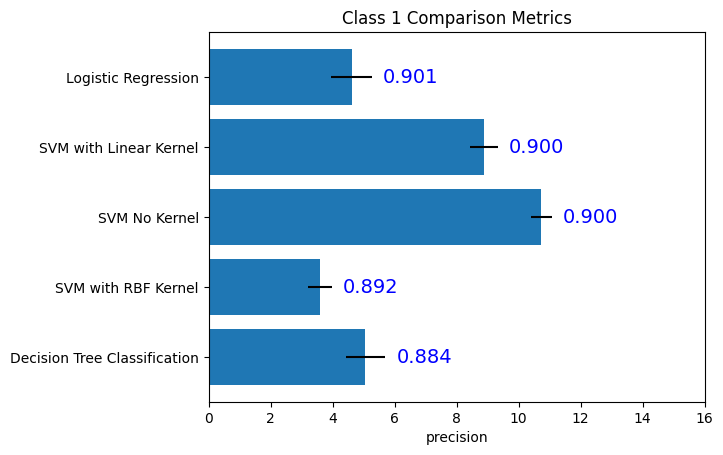

In [ ]:
import matplotlib.pyplot as plt

precision_scores1 = results_class_df1['precision']
models1 = results_class_df1['Model']

fig, ax = plt.subplots()
y_pos = np.arange(len(models1))
performance = 3 + 10 * np.random.rand(len(models1))
error = np.random.rand(len(models1))

hbars = ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=models1)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('precision')
ax.set_title('Class 1 Comparison Metrics')

ax.bar_label(hbars, labels=['%.3f' % e for e in precision_scores0],
             padding=8, color='b', fontsize=14)
ax.set_xlim(right=16)
plt.show()

#print('The Logistic regression model has higher precision, next is SVM (kernel=linear, C=1.0)')

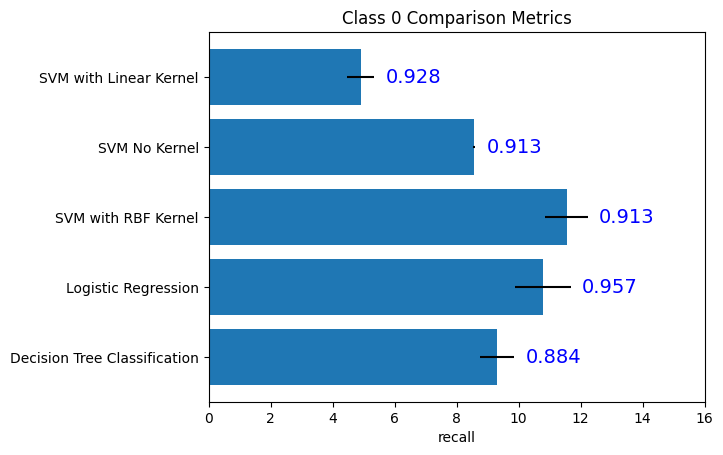

In [ ]:
import matplotlib.pyplot as plt

#results_class_df0 = results_class_df0.sort_values(by='recall', ascending=False)
#f1_scores0 = results_class_df0['f1-score']
#precision_scores0 = results_class_df0['precision']
recall_scores0 = results_class_df0['recall']
models0 = results_class_df0['Model']

fig, ax = plt.subplots()
y_pos = np.arange(len(models0))
performance = 3 + 10 * np.random.rand(len(models0))
error = np.random.rand(len(models0))

hbars = ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=models0)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('recall')
ax.set_title('Class 0 Comparison Metrics')

ax.bar_label(hbars, labels=['%.3f' % e for e in recall_scores0],
             padding=8, color='b', fontsize=14)
ax.set_xlim(right=16)
plt.show()
#print('The Logistic regression model has higher recall, next is SVM (kernel=linear, C=1.0)')

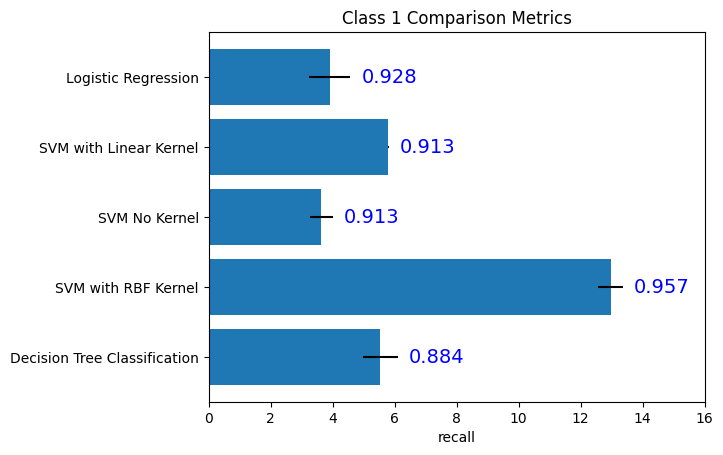

In [ ]:
import matplotlib.pyplot as plt

recall_scores1 = results_class_df1['recall']
models1 = results_class_df1['Model']

fig, ax = plt.subplots()
y_pos = np.arange(len(models1))
performance = 3 + 10 * np.random.rand(len(models1))
error = np.random.rand(len(models1))

hbars = ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=models1)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('recall')
ax.set_title('Class 1 Comparison Metrics')

ax.bar_label(hbars, labels=['%.3f' % e for e in recall_scores0],
             padding=8, color='b', fontsize=14)
ax.set_xlim(right=16)
plt.show()
#print('The Logistic regression model has higher recall, next is SVM (kernel=linear, C=1.0)')

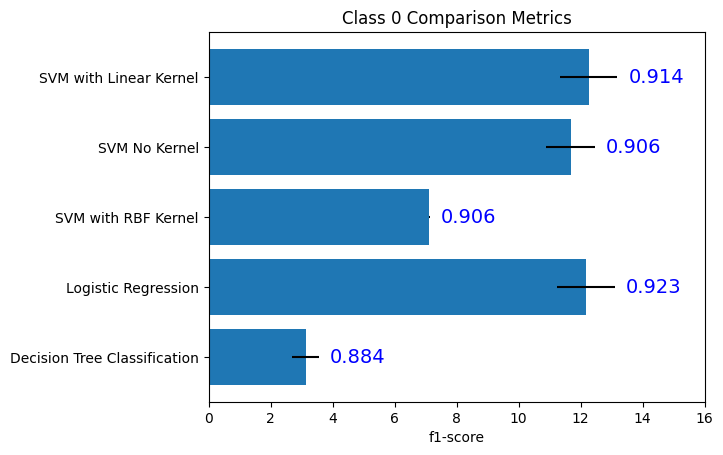

In [ ]:
import matplotlib.pyplot as plt


f1_scores0 = results_class_df0['f1-score']
#precision_scores0 = results_class_df0['precision']
#recall_scores0 = results_class_df0['recall']
models0 = results_class_df0['Model']

fig, ax = plt.subplots()
y_pos = np.arange(len(models0))
performance = 3 + 10 * np.random.rand(len(models0))
error = np.random.rand(len(models0))

hbars = ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=models0)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('f1-score')
ax.set_title('Class 0 Comparison Metrics')

ax.bar_label(hbars, labels=['%.3f' % e for e in f1_scores0],
             padding=8, color='b', fontsize=14)
ax.set_xlim(right=16)
plt.show()

#print('The Logistic regression model has higher f1-score, next is SVM (kernel=linear, C=1.0)')

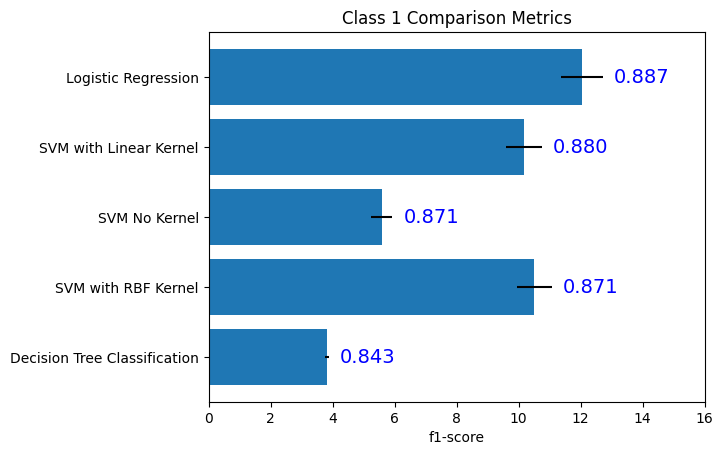

In [ ]:
import matplotlib.pyplot as plt


f1_scores0 = results_class_df1['f1-score']
models1 = results_class_df1['Model']

fig, ax = plt.subplots()
y_pos = np.arange(len(models1))
performance = 3 + 10 * np.random.rand(len(models1))
error = np.random.rand(len(models1))

hbars = ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=models1)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('f1-score')
ax.set_title('Class 1 Comparison Metrics')

ax.bar_label(hbars, labels=['%.3f' % e for e in f1_scores0],
             padding=8, color='b', fontsize=14)
ax.set_xlim(right=16)
plt.show()

#print('The Logistic regression model has higher f1-score, next is SVM (kernel=linear, C=1.0)')

Analyzing different classification models, getting almost the same accuracy and classification report. Data is simpler and does not have any overfitting problems. However, the Logistic regression model and SVM (kernel=linear, C=1.0) give the highest accuracy and higher precision, recall, and f1-score value .


#<font size=*4*, color='blue'> Comparision Regression vs Classification Models Analysis

### Converting test_pred from regression model to binary class test_pred_binary and y_test to y_test_binary and generate classification report

In [ ]:
# calculate thereshold value

y_mean = y.mean()
y_sd = y.std()
threshold = (25-y_mean)/y_sd
threshold

0.19004991262460272

In [ ]:
y_test

,mpg
174,-0.706439
359,0.587411
250,-0.527093
274,-0.411800
283,-0.424610
...,...
382,1.343225
39,-1.218855
171,0.062185
271,-0.040298


In [ ]:
arr_test = np.absolute(y_test)
y_test_binary = (arr_test.mpg >= threshold).astype(int)
y_test_binary.nunique()

2

In [ ]:
test_pred

array([-3.28155178e-01,  5.95091254e-01, -7.30826205e-01, -7.45460887e-02,
       -3.23220293e-01, -9.71719491e-01,  8.95917437e-01,  1.68197124e+00,
       -7.44433712e-01, -1.40617229e+00,  8.98312530e-01, -4.86312972e-01,
       -5.70620274e-01,  7.42214045e-02,  1.80744074e+00, -3.01159384e-01,
       -1.30442231e+00, -5.84668678e-01, -1.32494989e+00,  1.56858930e+00,
       -8.70701414e-02,  1.05156930e+00, -3.24078443e-01,  2.52761733e-01,
       -1.24046545e-01,  6.85694595e-01,  1.31022068e+00,  1.62186410e+00,
       -7.85630115e-01,  7.88499771e-01, -6.06343783e-04, -1.13738248e+00,
       -4.79651890e-01,  3.09233113e-01,  8.72657091e-02, -1.41410144e+00,
        4.64730641e-01, -1.13508698e+00,  1.18114943e+00,  1.72604746e-02,
        3.39988746e-01,  1.16803877e-01, -5.38222894e-01,  1.61965751e+00,
       -2.50570179e-02, -4.60464217e-01, -6.94687555e-01, -1.31147414e+00,
        5.10965717e-01, -7.40082462e-01,  3.11042927e-01,  2.70523026e-01,
       -9.58236126e-01, -

In [ ]:
arr_pred = np.absolute(test_pred)

dfyh = pd.DataFrame(arr_pred, columns=['By'])
dfyh

test_pred_binary = (dfyh.By >= threshold).astype(int)
test_pred_binary.nunique()

2

### <font size=*4*, color='black'> Generate Classification Report for Support Vector Machine Regression



In [ ]:
print('Support Vector Machine Regression')

print_classification_evaluate(y_test_binary,  test_pred_binary)



Support Vector Machine Regression

 Accuracy:  0.85

 CFM: 
 [[ 5  5]
 [13 97]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.28      0.50      0.36        10
           1       0.95      0.88      0.92       110

    accuracy                           0.85       120
   macro avg       0.61      0.69      0.64       120
weighted avg       0.89      0.85      0.87       120

